In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasets

c:\Users\Barath Raaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#pip install kaggle
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [4]:
api.dataset_download_file('thedevastator/comprehensive-medical-q-a-dataset',file_name = 'train.csv',path = 'D:/VScode/chatbot/')

Dataset URL: https://www.kaggle.com/datasets/thedevastator/comprehensive-medical-q-a-dataset


False

In [5]:
#----------------------------------------------------------IMPORTING THE DATA--------------------------------------------------------------------------------

import zipfile
with zipfile.ZipFile('D:/VScode/chatbot/train.csv.zip') as zipref:
    zipref.extractall()#df = pd.read_csv("D:/VScode/chatbot/test.csv", encoding='unicode_escape')
df = pd.read_csv('train.csv')
df = df.rename(columns={'Question': 'Questions', 'Answer': 'Answers'})


questions_list = df['Questions'].tolist()
answers_list = df['Answers'].tolist()


In [6]:
#---------------------------------------------------------------------------SAMPLE Q&A-------------------------------------------------------------------------------------
for i in range(0,5):
    print(questions_list[i])
    print("Ans: ",answers_list[i])

Who is at risk for Lymphocytic Choriomeningitis (LCM)? ?
Ans:  LCMV infections can occur after exposure to fresh urine, droppings, saliva, or nesting materials from infected rodents.  Transmission may also occur when these materials are directly introduced into broken skin, the nose, the eyes, or the mouth, or presumably, via the bite of an infected rodent. Person-to-person transmission has not been reported, with the exception of vertical transmission from infected mother to fetus, and rarely, through organ transplantation.
What are the symptoms of Lymphocytic Choriomeningitis (LCM) ?
Ans:  LCMV is most commonly recognized as causing neurological disease, as its name implies, though infection without symptoms or mild febrile illnesses are more common clinical manifestations. 
                
For infected persons who do become ill, onset of symptoms usually occurs 8-13 days after exposure to the virus as part of a biphasic febrile illness. This initial phase, which may last as long as

In [10]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Barath
[nltk_data]     Raaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Barath
[nltk_data]     Raaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Barath
[nltk_data]     Raaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    return ' '.join(stemmed_tokens)

def preprocess_with_stopwords(text):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    return ' '.join(stemmed_tokens)

In [15]:
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)

def get_response(text,questions_list):
    X = vectorizer.fit_transform([preprocess(q) for q in questions_list])
    processed_text = preprocess_with_stopwords(text)
    print("processed_text:", processed_text)
    vectorized_text = vectorizer.transform([processed_text])
    similarities = cosine_similarity(vectorized_text, X)
    print("similarities:", similarities)
    # Step 1: Convert to Pandas Series
    similarities_series = pd.Series(similarities[0])

    # Step 2: Get the top 10 value counts
    top_10_value_counts = similarities_series.value_counts().nlargest(10)

    # Step 3: Plot using Seaborn
    fig = plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=top_10_value_counts.index, y=top_10_value_counts.values)


    # Step 4: Add bar labels
    for container in ax.containers:
        ax.bar_label(container)

    plt.show()
    max_similarity = np.max(similarities)
    print("max_similarity:", max_similarity)
    if max_similarity > 0.6:
        high_similarity_questions = [q for q, s in zip(questions_list, similarities[0]) if s > 0.6]
        print("high_similarity_questions:", high_similarity_questions)

        target_answers = []
        for q in high_similarity_questions:
            q_index = questions_list.index(q)
            target_answers.append(answers_list[q_index])
        print(target_answers)

        Z = vectorizer.fit_transform([preprocess_with_stopwords(q) for q in high_similarity_questions])
        processed_text_with_stopwords = preprocess_with_stopwords(text)
        print("processed_text_with_stopwords:", processed_text_with_stopwords)
        vectorized_text_with_stopwords = vectorizer.transform([processed_text_with_stopwords])
        final_similarities = cosine_similarity(vectorized_text_with_stopwords, Z)
        closest = np.argmax(final_similarities)
        return target_answers[closest]
    else:
        return "I can't answer this question."

#get_response('Talk about machine learning and data analytics',questions_list)

c:\Users\Barath Raaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


processed_text: hello who is thi
similarities: [[0. 0. 0. ... 0. 0. 0.]]


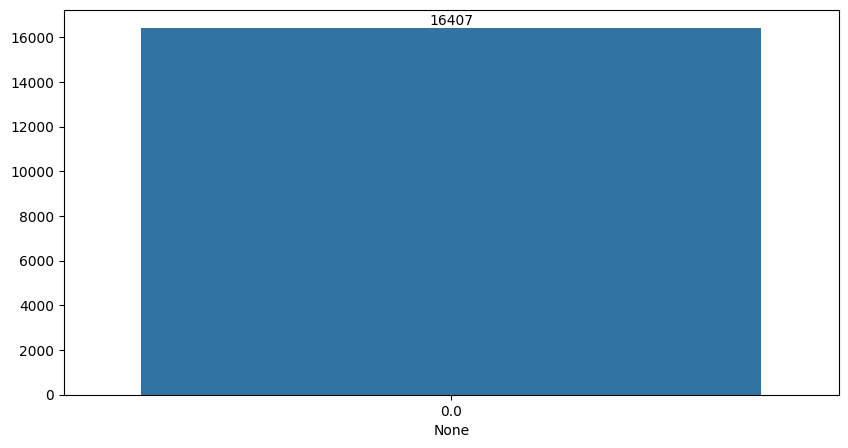

max_similarity: 0.0


"I can't answer this question."

In [16]:
get_response('Hello who is this',questions_list)

In [44]:
# from gingerit import GingerIt

# text = 'What is Data Anlytics'
# parser = GingerIt()
# corrected_text = parser.parse(text)

# print(corrected_text['result'])

c:\Users\Barath Raaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


processed_text: treatment for parasit hookworm
similarities: [[0.         0.         0.         ... 0.         0.05922805 0.        ]]


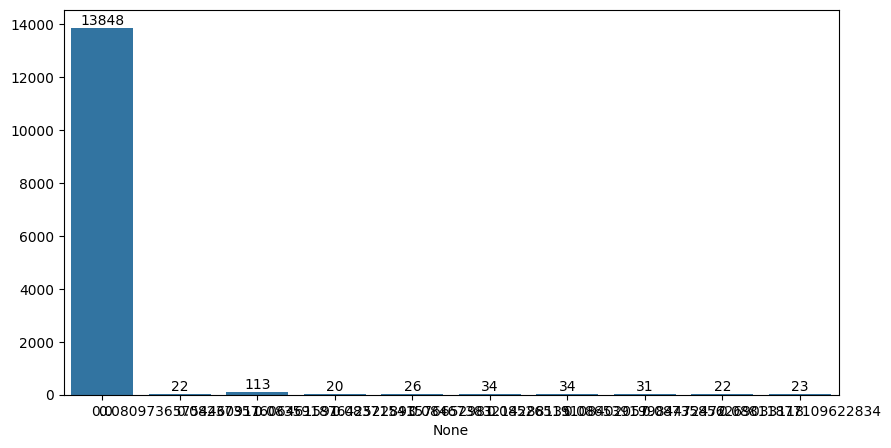

max_similarity: 1.0000000000000002
high_similarity_questions: ['What is (are) Parasites - Hookworm ?', 'Who is at risk for Parasites - Hookworm? ?', 'How to diagnose Parasites - Hookworm ?', 'What are the treatments for Parasites - Hookworm ?', 'How to prevent Parasites - Hookworm ?', 'What is (are) Parasites - Zoonotic Hookworm ?', 'Who is at risk for Parasites - Zoonotic Hookworm? ?', 'How to diagnose Parasites - Zoonotic Hookworm ?', 'What are the treatments for Parasites - Zoonotic Hookworm ?', 'How to prevent Parasites - Zoonotic Hookworm ?']
['Hookworm is an intestinal parasite of humans. The larvae and adult worms live in the small intestine can cause intestinal disease. The two main species of hookworm infecting humans are Ancylostoma duodenale and Necator americanus.', 'Hookworm is a soil-transmitted helminth (STH) and is one of the most common roundworm of humans. Infection is caused by the nematode parasites Necator americanus and Ancylostoma duodenale. Hookworm infections o

c:\Users\Barath Raaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


'Anthelminthic medications (drugs that rid the body of parasitic worms), such as albendazole and mebendazole, are the drugs of choice for treatment of hookworm infections. Infections are generally treated for 1-3 days. The recommended medications are effective and appear to have few side effects. Iron supplements may also be prescribed if the infected person has anemia.\n    \nMore on: Resources for Health Professionals: Treatment'

In [17]:
get_response('Treatment for parasites, Hookworm',questions_list)